In [14]:
import pandas as pd
import numpy as np
import string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords


# import these modules
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
nltk.download('omw-1.4')
lemmatizer = WordNetLemmatizer() 


nltk.download('punkt')
from nltk.stem import PorterStemmer
ps = PorterStemmer() #will remove pre-defined stems


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Eduardo\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Eduardo\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Eduardo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [15]:
# import CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer
 
# import TfidfTransformer 
from sklearn.feature_extraction.text import TfidfTransformer

# import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.pipeline import Pipeline

Exploration

In [16]:
df = pd.read_csv("train.csv")

In [17]:
df_visuals = pd.read_csv("train.csv")

In [18]:
df = df.sample(30000,random_state=2)

In [19]:
df_visuals = df_visuals.sample(30000,random_state=1).reset_index()

In [20]:
df_visuals = df_visuals.drop(['index','id','qid1','qid2'], axis=1)

In [21]:
df_visuals.head()

,question1,question2,is_duplicate
0,How can I stop playing video games?,Should I stop playing video games with my child?,0
1,Who is better Donald Trump or Hillary Clinton?,Why is Hillary Clinton a better choice than Do...,1
2,What do you think is the chance that sometime ...,Do you think there will be another world war/n...,1
3,Why are so many questions posted to Quora that...,Why do people write questions on Quora that co...,1
4,Can there even be a movie ever rated 10/10 on ...,What are your 10/10 movies?,0


In [22]:
top_5_value_counts = df_visuals['is_duplicate'].value_counts()

In [23]:
print(top_5_value_counts)

0    18968
1    11032
Name: is_duplicate, dtype: int64


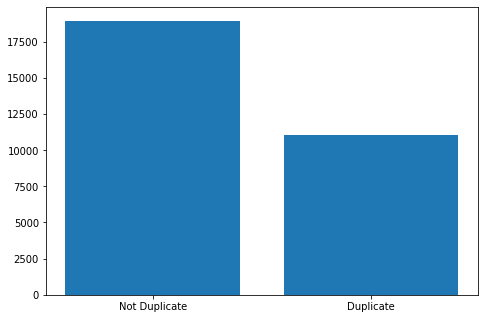

In [24]:
import matplotlib.pyplot as plt
title = ['Not Duplicate', 'Duplicate']
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(title, top_5_value_counts)
plt.show()

Preprocessing

In [25]:
df.head(1)

,id,qid1,qid2,question1,question2,is_duplicate
398782,398782,496695,532029,What is the best marketing automation tool for...,What is the best marketing automation tool for...,1


In [26]:
df = df.reset_index().drop('index', axis=1)

In [28]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,398782,496695,532029,What is the best marketing automation tool for...,What is the best marketing automation tool for...,1
1,115086,187729,187730,I am poor but I want to invest. What should I do?,I am quite poor and I want to be very rich. Wh...,0
2,327711,454161,454162,I am from India and live abroad. I met a guy f...,T.I.E.T to Thapar University to Thapar Univers...,0
3,367788,498109,491396,Why do so many people in the U.S. hate the sou...,My boyfriend doesnt feel guilty when he hurts ...,0
4,151235,237843,50930,Consequences of Bhopal gas tragedy?,What was the reason behind the Bhopal gas trag...,0


In [29]:
df['question1'][0], df['question2'][0]

('What is the best marketing automation tool for small and mid-size companies?',
 'What is the best marketing automation tool for small and mid-sized companies?')

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            30000 non-null  int64 
 1   qid1          30000 non-null  int64 
 2   qid2          30000 non-null  int64 
 3   question1     30000 non-null  object
 4   question2     30000 non-null  object
 5   is_duplicate  30000 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 1.4+ MB


In [31]:
#Can remove "id" columns

df = df.drop(['id','qid1','qid2'], axis=1)

In [32]:
# Remove null values

df = df.dropna()


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   question1     30000 non-null  object
 1   question2     30000 non-null  object
 2   is_duplicate  30000 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 703.2+ KB


In [34]:
#"is_duplicate" column is the target
df_y = df['is_duplicate']
df = df.drop('is_duplicate', axis=1)

In [35]:
df.head(2)

,question1,question2
0,What is the best marketing automation tool for...,What is the best marketing automation tool for...
1,I am poor but I want to invest. What should I do?,I am quite poor and I want to be very rich. Wh...


In [36]:
df_y = pd.DataFrame(df_y)

df_y.value_counts()

#Can notice an imbalance in the data

is_duplicate
0               19013
1               10987
dtype: int64

In [37]:
df['question1'].value_counts().sort_values(ascending=False)[:6]

How could I be fluent in English?                                                                 7
How can I lose weight loss?                                                                       6
What are the best ways to lose weight fast?                                                       6
How can changing 500 and 1000 rupee notes end the black money in India?                           6
Why do people often ask questions in Quora while they can Google it themselves?                   6
Why do so may people ask questions on Quora that can easily be found by a simple Google searh?    6
Name: question1, dtype: int64

In [38]:
df['question2'].value_counts().sort_values(ascending=False)[:6]

How can I lose weight quickly?                                                               8
How can someone lose weight quickly?                                                         7
What are the safety precautions on handling shotguns proposed by the NRA in Pennsylvania?    7
What are the best was to lose weight?                                                        6
What are some ways to improve English?                                                       6
What are the possible implications of Demonetization of 500 and 1000 rupee notes?            5
Name: question2, dtype: int64

### Cleaning

- Tokenization
- Stopwords cleaning
- Removing punctuation
- Normalizing
- Stemming

In [39]:
stopset = set(stopwords.words('english'))

In [40]:
#Functions for preprocessing

def remove_punct(text):
    text = "".join([char for char in text if char not in string.punctuation])
    return text
def remove_stopwords(dataset):    
    text = [word for word in dataset.split() if word not in stopset]
    return " ".join(text)
def lemma(data):
    lemmatized = [lemmatizer.lemmatize(word) for word in data]
    return lemmatized
def stem(dataset):
    words = [ps.stem(word) for word in dataset]
    return words

In [47]:
#Preprocessing


def preprocess(df, column, New_Column):
    df[New_Column] = df[column].apply(lambda x: remove_punct(x)) #remove punctuation
    df[New_Column] = df[New_Column].apply(lambda x: remove_stopwords(x))
    df[New_Column] = df[New_Column].apply(lambda x: word_tokenize(x.lower())) #tokenize and make lowercase
    # df[New_Column] = df[New_Column].apply(lambda x: remove_stopwords(x)) #remove stopwords - MUST USE 'New_Column' not original column
    df[New_Column] = df[New_Column].apply(lambda x: lemma(x))
    df[New_Column] = df[New_Column].apply(lambda x: stem(x))
    
    return df

In [48]:
preprocess(df, 'question1', 'question1_post_process')

,question1,question2,question1_post_process
0,What is the best marketing automation tool for...,What is the best marketing automation tool for...,"[what, best, market, autom, tool, small, midsi..."
1,I am poor but I want to invest. What should I do?,I am quite poor and I want to be very rich. Wh...,"[i, poor, i, want, invest, what, i]"
2,I am from India and live abroad. I met a guy f...,T.I.E.T to Thapar University to Thapar Univers...,"[i, india, live, abroad, i, met, guy, franc, p..."
3,Why do so many people in the U.S. hate the sou...,My boyfriend doesnt feel guilty when he hurts ...,"[whi, mani, peopl, u, hate, southern, state]"
4,Consequences of Bhopal gas tragedy?,What was the reason behind the Bhopal gas trag...,"[consequ, bhopal, ga, tragedi]"
...,...,...,...
29995,What are some good web scraping tutorials?,What are some good web scraping programs?,"[what, good, web, scrape, tutori]"
29996,Can I apply for internet banking in SBI withou...,I have internet banking kit of SBI but it's no...,"[can, i, appli, internet, bank, sbi, without, ..."
29997,How much HE laundry detergent do you use in a ...,Can I use regular Dawn dishsoap in my dishwash...,"[how, much, he, laundri, deterg, use, top, loa..."
29998,What is the best way to understand and learn m...,What are some of the best ways to learn math?,"[what, best, way, understand, learn, math]"


In [49]:
preprocess(df,'question2', 'question2_post_process')

,question1,question2,question1_post_process,question2_post_process
0,What is the best marketing automation tool for...,What is the best marketing automation tool for...,"[what, best, market, autom, tool, small, midsi...","[what, best, market, autom, tool, small, midsi..."
1,I am poor but I want to invest. What should I do?,I am quite poor and I want to be very rich. Wh...,"[i, poor, i, want, invest, what, i]","[i, quit, poor, i, want, rich, what, i]"
2,I am from India and live abroad. I met a guy f...,T.I.E.T to Thapar University to Thapar Univers...,"[i, india, live, abroad, i, met, guy, franc, p...","[tiet, thapar, univers, thapar, univers, insti..."
3,Why do so many people in the U.S. hate the sou...,My boyfriend doesnt feel guilty when he hurts ...,"[whi, mani, peopl, u, hate, southern, state]","[my, boyfriend, doesnt, feel, guilti, hurt, he..."
4,Consequences of Bhopal gas tragedy?,What was the reason behind the Bhopal gas trag...,"[consequ, bhopal, ga, tragedi]","[what, reason, behind, bhopal, ga, tragedi]"
...,...,...,...,...
29995,What are some good web scraping tutorials?,What are some good web scraping programs?,"[what, good, web, scrape, tutori]","[what, good, web, scrape, program]"
29996,Can I apply for internet banking in SBI withou...,I have internet banking kit of SBI but it's no...,"[can, i, appli, internet, bank, sbi, without, ...","[i, internet, bank, kit, sbi, work, whi]"
29997,How much HE laundry detergent do you use in a ...,Can I use regular Dawn dishsoap in my dishwash...,"[how, much, he, laundri, deterg, use, top, loa...","[can, i, use, regular, dawn, dishsoap, dishwas..."
29998,What is the best way to understand and learn m...,What are some of the best ways to learn math?,"[what, best, way, understand, learn, math]","[what, best, way, learn, math]"


In [50]:
#making copy of raw df
df_raw = df

### Feature Engineering

- tf-idf
- word2vec
- word count
- number of the same words in both questions
- ....

In [51]:
from sklearn.feature_extraction.text import TfidfVectorizer
# merge texts
questions = list(df['question1']) + list(df['question2'])

tf = TfidfVectorizer(max_features=3000)
q1_arr, q2_arr = np.vsplit(tf.fit_transform(questions).toarray(),2)

In [52]:
temp_df1 = pd.DataFrame(q1_arr, index=df.index)
temp_df2 = pd.DataFrame(q2_arr, index=df.index)
temp_df = pd.concat([temp_df1, temp_df2], axis=1)
temp_df.shape

(30000, 6000)

In [53]:
# Create character length based features

df['len_q1'] = df.question1.apply(lambda x: len(str(x)))

df['len_q2'] = df.question2.apply(lambda x: len(str(x)))


# difference in lengths of two questions
df['diff_len'] = df.len_q1 - df.len_q2


In [54]:
# Create word length based features

df['len_word_q1'] = df.question1.apply(lambda x: len(str(x).split()))

df['len_word_q2'] = df.question2.apply(lambda x: len(str(x).split()))


#difference in lengths by word of two questions
df['diff_len_word'] = df.len_word_q1 - df.len_word_q2

In [55]:
#find common_words

df['common_words'] = df.apply(lambda x: len(set(str(x['question1']).lower().split())
.intersection(set(str(x['question2']).lower().split()))), axis=1)

In [56]:
#Word Embedding

In [57]:
import gensim
from gensim.models import Word2Vec

#Word2Vec Question 1

model = gensim.models.KeyedVectors.load_word2vec_format("GoogleNews-vectors-negative300.bin.gz", binary=True)

In [58]:
def is_ascii(s):
    return all(ord(c) < 128 for c in s)



def sent2vec(s, model): 
    M = []
    words = str(s).lower().split()
    for word in words:
        i=is_ascii(word)
        if (i):
            if word not in stopset:
                if word.isalpha():
                    if word in model:
                        M.append(model[word])
    M = np.array(M)
    if len(M) > 0:
        v = M.sum(axis=0)
        return v / np.sqrt((v ** 2).sum())
    else:
        return np.zeros(300)  #1*300
        

w2v_q1 = np.array([sent2vec(q, model) for q in df.question1])
w2v_q2 = np.array([sent2vec(q, model) for q in df.question2])

In [59]:
from scipy.spatial.distance import cosine, cityblock,jaccard, canberra, euclidean, minkowski, braycurtis

In [60]:
df['cosine_distance'] = [cosine(x,y) for (x,y) in zip(w2v_q1, w2v_q2)]  #x y 1-D array
df['cityblock_distance'] = [cityblock(x,y) for (x,y) in zip(w2v_q1, w2v_q2)]
df['jaccard_distance'] = [jaccard(x,y) for (x,y) in zip(w2v_q1, w2v_q2)]
df['canberra_distance'] = [canberra(x,y) for (x,y) in zip(w2v_q1, w2v_q2)]
df['euclidean_distance'] = [euclidean(x,y) for (x,y) in zip(w2v_q1, w2v_q2)]
df['minkowski_distance'] = [minkowski(x,y,3) for (x,y) in zip(w2v_q1, w2v_q2)]
df['braycurtis_distance'] = [braycurtis(x,y) for (x,y) in zip(w2v_q1, w2v_q2)]

c:\Users\Eduardo\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\spatial\distance.py:630: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)
c:\Users\Eduardo\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\spatial\distance.py:1162: RuntimeWarning: invalid value encountered in double_scalars
  return l1_diff.sum() / l1_sum.sum()


In [61]:
df.head(2)

,question1,question2,question1_post_process,question2_post_process,len_q1,len_q2,diff_len,len_word_q1,len_word_q2,diff_len_word,common_words,cosine_distance,cityblock_distance,jaccard_distance,canberra_distance,euclidean_distance,minkowski_distance,braycurtis_distance
0,What is the best marketing automation tool for...,What is the best marketing automation tool for...,"[what, best, market, autom, tool, small, midsi...","[what, best, market, autom, tool, small, midsi...",76,77,-1,12,12,0,11,0.000000,0.000000,0.0,0.000000,0.000000,0.00000,0.000000
1,I am poor but I want to invest. What should I do?,I am quite poor and I want to be very rich. Wh...,"[i, poor, i, want, invest, what, i]","[i, quit, poor, i, want, rich, what, i]",49,57,-8,12,15,-3,7,0.107566,6.404117,1.0,101.455885,0.463823,0.20996,0.231503


In [62]:
df.columns

Index(['question1', 'question2', 'question1_post_process',
       'question2_post_process', 'len_q1', 'len_q2', 'diff_len', 'len_word_q1',
       'len_word_q2', 'diff_len_word', 'common_words', 'cosine_distance',
       'cityblock_distance', 'jaccard_distance', 'canberra_distance',
       'euclidean_distance', 'minkowski_distance', 'braycurtis_distance'],
      dtype='object')

In [63]:
#Advanced Features

combined_df = pd.concat([df, temp_df], axis=1)

In [64]:
combined_df.shape

(30000, 6018)

In [65]:
df['braycurtis_distance'].describe()

count    29805.000000
mean         0.425145
std          0.240180
min          0.000000
25%          0.282068
50%          0.409923
75%          0.561032
max          1.131726
Name: braycurtis_distance, dtype: float64

In [66]:
df['braycurtis_distance'] = df['braycurtis_distance'].fillna(df['braycurtis_distance'].mean())

In [67]:
advanced_df = combined_df.drop(['question1','question2','question1_post_process','question2_post_process'], axis=1)

In [68]:
# This function take a dataframe
# as a parameter and returning list
# of column names whose contents 
# are duplicates.
def getDuplicateColumns(df):
  
    # Create an empty set
    duplicateColumnNames = set()
      
    # Iterate through all the columns 
    # of dataframe
    for x in range(df.shape[1]):
          
        # Take column at xth index.
        col = df.iloc[:, x]
          
        # Iterate through all the columns in
        # DataFrame from (x + 1)th index to
        # last index
        for y in range(x + 1, df.shape[1]):
              
            # Take column at yth index.
            otherCol = df.iloc[:, y]
              
            # Check if two columns at x & y
            # index are equal or not,
            # if equal then adding 
            # to the set
            if col.equals(otherCol):
                duplicateColumnNames.add(df.columns.values[y])
                  
    # Return list of unique column names 
    # whose contents are duplicates.
    return list(duplicateColumnNames)

In [69]:
# # Get list of duplicate columns - WARNING: took 49 minutes to complete

# duplicateColNames = getDuplicateColumns(advanced_df)

In [70]:
# for column in duplicateColNames:
#     print('Column Name : ', column)

In [71]:
advanced_df = advanced_df.drop([1504, 138, 1869], axis=1)

In [72]:
#More advanced NLP - Future progress

# from transformers import XLNetTokenizer, XLNetModel

In [73]:
# class XLNET_Embedding():

#     def __init__(self, name, clean):
#         self.name = name
#         self.clean = clean
#         self.tokenizer = XLNetTokenizer.from_pretrained(self.name)
#         self.model = XLNetModel.from_pretrained(self.name)

#     def vectors(self, s):
#         input_ids = torch.tensor(self.tokenizer.encode(s,
#                                  add_special_tokens=True)).unsqueeze(0)
#         outputs = self.model(input_ids)
#         last_hidden_states = outputs[0][:, -1].detach().numpy()
#         return last_hidden_states

### Modeling

Different modeling techniques can be used:

- logistic regression
- XGBoost
- LSTMs
- etc

In [74]:
from sklearn.preprocessing import StandardScaler
import pickle

In [75]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


In [76]:
scaler = StandardScaler()

In [77]:
#Defining Basic Features

Basic_features = ['len_q1', 'len_q2', 'diff_len', 'len_word_q1',
       'len_word_q2', 'diff_len_word', 'common_words', 'cosine_distance',
       'cityblock_distance', 'jaccard_distance', 'canberra_distance',
       'euclidean_distance', 'minkowski_distance', 'braycurtis_distance']
       
length_features = ['len_q1', 'len_q2', 'diff_len', 'len_word_q1', 'len_word_q2', 'diff_len_word', 'common_words']
       
Word2Vec_features = ['cosine_distance', 'cityblock_distance', 'jaccard_distance', 'canberra_distance', 'euclidean_distance', 'minkowski_distance', 'braycurtis_distance']


In [78]:
from sklearn.model_selection import train_test_split

X_train_basic, X_test_basic, y_train_basic, y_test_basic = train_test_split(df[Basic_features], df_y, random_state=0)

In [79]:
X_train_length, X_test_length, y_train_length, y_test_length = train_test_split(df[length_features], df_y, random_state=0)

In [80]:
X_train_word, X_test_word, y_train_word, y_test_word = train_test_split(df[Word2Vec_features], df_y, random_state=0)

In [81]:
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

X_gb = XGBClassifier(
    max_depth=80,
    n_estimators=100,
    learning_rate=0.1,
    colsample_bytree=.7,
    gamma=0,
    reg_alpha=4,
    objective='binary:logistic',
    eta=0.3,
    silent=1,
    )


logres = LogisticRegression(C=0.1, solver='sag', max_iter=5000)

In [82]:
#Basic Features XGBoost

X_gb.fit(X_train_basic,y_train_basic)
y_predxgb = X_gb.predict(X_test_basic)
accuracy_score(y_test_basic,y_predxgb)

[15:19:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




0.7133333333333334

In [85]:
#length Features XGBoost

X_gb.fit(X_train_length, y_train_length)
y_predxgb = X_gb.predict(X_test_length)
accuracy_score(y_test_length,y_predxgb)

[15:20:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




0.6970666666666666

In [86]:
#Word Features XGBoost

X_gb.fit(X_train_word, y_train_word)
y_predxgb = X_gb.predict(X_test_word)
accuracy_score(y_test_word,y_predxgb)

[15:20:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




0.6545333333333333

In [ ]:
#Basic Features Logistic Regression

logres.fit(X_train_basic,y_train_basic)
y_predlog = logres.predict(X_test_basic)
accuracy_score(y_test_basic, y_predlog)

c:\Users\Eduardo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.6697333333333333

In [87]:
#length Features Logistic Regression

logres.fit(X_train_length,y_train_length)
y_predlog = logres.predict(X_test_length)
accuracy_score(y_test_length, y_predlog)

c:\Users\Eduardo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.6622666666666667

In [88]:
#Word2vec Features Logistic Regression

logres.fit(X_train_word,y_train_word)
y_predlog = logres.predict(X_test_word)
accuracy_score(y_test_word, y_predlog)

c:\Users\Eduardo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.6637333333333333